In [1]:
import cv2
import ipympl
import numpy as np
np.random.seed(42)
import pandas as pd
import math
import scipy.io
import hdf5storage
#import matplotlib
#matplotlib.use('nbagg')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean 
from sklearn.model_selection import train_test_split
from keras.callbacks.callbacks import EarlyStopping
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.python.keras.models import Model
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from keras import backend as K
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from sklearn.metrics import classification_report
 

Using TensorFlow backend.


In [2]:
#mat = scipy.io.loadmat('cardio.mat')
#mat = scipy.io.loadmat('shuttle.mat')
#
#mat = hdf5storage.loadmat('smtp.mat')
#mat = scipy.io.loadmat('wine.mat')
#mat = scipy.io.loadmat('arrhythmia.mat')
#mat = scipy.io.loadmat('thyroid.mat')

#mat = scipy.io.loadmat('ionosphere.mat')
mat = scipy.io.loadmat('satellite.mat')

In [3]:
epochs = 200
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=1)]

In [4]:
Xtemp = mat['X']
ytemp = mat['y']
X = np.array(Xtemp)
y = np.array(ytemp)
print(X.shape)
y = y.reshape(X.shape[0],)
print(y.shape)

(6435, 36)
(6435,)


In [5]:
outliers = 0
clean_data = []
contam_data = []

for i in range(y.shape[0]):
    if(y[i]==1.0):
        outliers+=1;
        contam_data.append(X[i])
    else:
        clean_data.append(X[i])
      
print("Total number of outliers in Dataset")        
print(outliers)
contam = outliers/y.shape[0]
print("Contamination in Dataset")
print(contam)
clean_data = np.array(clean_data)
contam_data = np.array(contam_data)
print(clean_data.shape)
clean_data2 = clean_data.copy()
contam_data2 = contam_data.copy()
# test_data_full = []
# for i in range(176):
#     test_data_full.append(contam_data[i])
# one = np.ones(176)
# test_data_full = np.array(test_data_full)

# test_data_full= np.append(test_data_full,one,1)

# print(test_data_full.shape)

Xy = X.copy()
Xy.shape
Xy = np.array(Xy)
Xy = np.insert(Xy, X.shape[1], y, axis=1)
#print(Xy.shape)
count = outliers
count2 = outliers



#selecting all the outliers from dataset
test_data =[]
for i in range(Xy.shape[0]):
    if(Xy[i,X.shape[1]]==1 and count>0):
        test_data.append(Xy[i])
        count = count-1
    
test_data = np.array(test_data)

#selecting random inliers from train data and removing them
indexes = np.random.choice(clean_data.shape[0], outliers, replace=False)

random_clean_data = clean_data[indexes, :]
random_clean_data = np.hstack((random_clean_data, np.zeros((random_clean_data.shape[0], 1), dtype=random_clean_data.dtype)))

indexes = indexes.reshape(outliers,1)

#deleting the values from train data
clean_data = np.delete(clean_data,indexes,0)
#print(clean_data)                
test_data = np.append(test_data,random_clean_data,axis=0)
np.random.shuffle(test_data)

print("test_data.shape")
print(test_data.shape)
#print(test_data.shape)
test_x = test_data[:,:test_data.shape[1]-1]
test_y = test_data[:,test_data.shape[1]-1]
#print(test_x.shape)
#print(test_y.shape)
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y)

print("train_data.shape")                    
print(clean_data.shape)                         

Total number of outliers in Dataset
2036
Contamination in Dataset
0.3163947163947164
(4399, 36)
test_data.shape
(4072, 37)
train_data.shape
(2363, 36)


In [6]:
X_train, X_test = train_test_split(clean_data2,  test_size=0.03, random_state=42)
X_test = np.append(X_test,np.zeros((X_test.shape[0],1),dtype='float64'),axis=1)

inliers_test = X_test.shape[0]

contam_new = contam_data2.shape[0]/X_test.shape[0]
contam_data3 = np.append(contam_data2,np.ones((contam_data2.shape[0],1),dtype='float64'),axis=1)
outliers_test = contam_data3.shape[0]
X_test = np.append(X_test,contam_data3,axis=0)
np.random.shuffle(X_test)
Xy_test = X_test.copy
y_test = X_test[:,X_test.shape[1]-1]
#print(y_test.shape)
X_test = np.delete(X_test,X_test.shape[1]-1,axis=1)
#print(X_test.shape)

X_test_np = X_test
y_test_np = y_test
print(y_test.shape)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
print("Number of Outliers in Test")
print(outliers_test)
print("Number of Inliers in Test")
print(inliers_test)
#print(X_train)
print(X_train.mean())
print(pd.DataFrame(X_train).describe())
X_train_noisy = X_train
#noisy data
#print(X_train_noisy)
def apply_noise(col):
    print(col.mean())
    mu, sigma = 0, abs(col.mean())
    noise = np.random.normal(mu, sigma, col.shape[0]) 
    for i  in range(col.shape[0]):
        col[i] += noise[i]

    return col
#print(X_train)
X_train_noisy = np.apply_along_axis(apply_noise, 0, X_train)

(2168,)
Number of Outliers in Test
2036
Number of Inliers in Test
132
86.08132828164466
                0            1            2            3            4   \
count  4267.000000  4267.000000  4267.000000  4267.000000  4267.000000   
mean     72.758613    92.351535   100.022733    80.099367    72.674244   
std      12.115027    15.806738    16.259721    13.572191    12.050927   
min      46.000000    34.000000    62.000000    48.000000    46.000000   
25%      64.000000    79.000000    85.000000    68.000000    64.000000   
50%      70.000000    95.000000   104.000000    83.000000    70.000000   
75%      84.000000   106.000000   113.000000    91.000000    84.000000   
max     104.000000   137.000000   139.000000   133.000000   104.000000   

                5            6            7            8            9   ...  \
count  4267.000000  4267.000000  4267.000000  4267.000000  4267.000000  ...   
mean     92.284509    99.918210    80.038434    72.413405    91.879775  ...   
std     

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
clean_data = scaler.fit_transform(clean_data)
test_x  = scaler.transform(test_x)
clean_data = pd.DataFrame(clean_data)

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
clean_data = pd.DataFrame(clean_data)


In [8]:
#deep autoencoder
inputs = Input(shape=(X.shape[1],))
#encoded = Dense(50, activation='relu')(inputs)
#encoded = Dense(25, activation='relu')(inputs)

encoded = Dense(round(X.shape[1]/2), activation='relu'
                #,activity_regularizer=regularizers.l1(1e-3)
               ,kernel_regularizer=l2(0.01) 
                ,bias_regularizer=l2(0.01)
               )(inputs)
encoded = Dense(4, activation='relu'
               # ,activity_regularizer=regularizers.l1(1e-3)
              # ,kernel_regularizer=l2(0.01), 
              # ,bias_regularizer=l2(0.01)
               )(encoded)

decoded = Dense(round(X.shape[1]/2), activation='relu'
               #,activity_regularizer=regularizers.l1(1e-3)
               #,kernel_regularizer=l2(0.01), 
              #, bias_regularizer=l2(0.01)
               )(encoded)
#decoded = Dense(21, activation='relu')(decoded)
decoded = Dense(X.shape[1], activation='tanh')(decoded)


In [9]:
autoencoder = Model(inputs, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=epochs,
                callbacks=callbacks,
                batch_size = 256,
                shuffle = False,
                validation_split=0.4
               )

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 18)                666       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 76        
_________________________________________________________________
dense_2 (Dense)              (None, 18)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 36)                684       
Total params: 1,516
Trainable params: 1,516
Non-trainable params: 0
_________________________________________________________________
Train on 2560 samples, validate on 1707 samples
Epoch 1/200
2560/2560 [==============================] - 1s 311us/sample - lo

In [10]:
#encoded_data = encoder.predict(test_x)
decoded_data = autoencoder.predict(X_test)
#print(dict(zip(unique, counts)))
#print(np.std(np.sqrt(np.power(test_x - decoded_data, 2)),axis=1))
mse = np.mean((np.power(X_test - decoded_data, 2)), axis=1)

mse = mse.reshape(-1, 1)
print(mse.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
mse = scaler.fit_transform(mse)

print("Mean")
print(mse.mean())


(2168, 1)
Mean
0.4664032351833483


In [11]:
df_error = pd.DataFrame({'reconstruction_error': mse[:,0]})
print(df_error.describe())
print(round(df_error.shape[0]*3/100))
#print(df_error.sort_values("reconstruction_error")[df_error.shape[0]-(round(df_error.shape[0]*3/100)):])

       reconstruction_error
count           2168.000000
mean               0.466403
std                0.221274
min                0.000000
25%                0.274547
50%                0.481774
75%                0.665860
max                1.000000
65


In [12]:
# import time
# start_time = time.time()

# if(df_error.reconstruction_error.max()>2):
#     maxi = find_max(calc_res,round(df_error.reconstruction_error.max()/2),df_error,y_test)
# else:
#     maxi = find_max(calc_res,df_error.reconstruction_error.max(),df_error,y_test)

# #print(maxi)
# #print(calc_res(maxi))

# print("--- %s seconds ---" % (time.time() - start_time))
# print(maxi)

In [13]:
# print_res(maxi,df_error,y_test)
# print("Threshold")

# print("Mean")
# print(mse.mean())

# plt.scatter(range(mse.shape[0]),mse,c = mse)

# plt.plot((range(mse.shape[0])),np.repeat(mse.mean(),mse.shape[0]),c='g',label='Mean Line')
# plt.plot((range(mse.shape[0])),np.repeat(0.11013,mse.shape[0]),c='purple',label='Threshold Line')

# plt.legend(loc="upper right")

In [14]:

# y_pred_keras = []
# for i in range(y_test.shape[0]):
#     if(mse[i]>maxi):
#         y_pred_keras.append(1)
#     else:
#         y_pred_keras.append(0)
        
# y_pred_keras = np.array(y_pred_keras)


In [15]:
# print(y_pred_keras)

In [16]:
#deep autoencoder
encoded2 = Dense(round(X.shape[1]/1.5), activation='relu'
                 #,activity_regularizer=regularizers.l1(1e-3)
                , kernel_regularizer=l2(0.01) 
               , bias_regularizer=l2(0.01)
                )(inputs)
encoded2 = Dense(round(X.shape[1]/3), activation='relu'
                 #,activity_regularizer=regularizers.l1(1e-3)
                 ,kernel_regularizer=l2(0.01)
                ,bias_regularizer=l2(0.01)
                )(encoded2)
#encoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
encoded2 = Dense(3, activation='relu'
                #,activity_regularizer=regularizers.l1(1e-3)
                )(encoded2)

#decoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
decoded2 = Dense(round(X.shape[1]/3), activation='relu'
               #  ,
                # kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(encoded2)
decoded2 = Dense(round(X.shape[1]/1.5), activation='relu'
               #  ,
               #  kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(decoded2)
decoded2 = Dense(X.shape[1], activation='tanh')(decoded2)

# inputs2 = Input(shape=(X.shape[1],))
# #encoded = Dense(50, activation='relu')(inputs)
# #encoded = Dense(25, activation='relu')(inputs)

# encoded2 = Dense(round(X.shape[1]/3), activation='relu'
#                 ,activity_regularizer=regularizers.l1(1e-3)
#                ,kernel_regularizer=l2(0.01) 
#                 ,bias_regularizer=l2(0.01)
#                )(inputs2)
# encoded2 = Dense(4, activation='relu'
#                # ,activity_regularizer=regularizers.l1(1e-3)
#               # ,kernel_regularizer=l2(0.01), 
#               # ,bias_regularizer=l2(0.01)
#                )(encoded2)

# decoded2 = Dense(round(X.shape[1]/3), activation='relu'
#                ,activity_regularizer=regularizers.l1(1e-3)
#                #,kernel_regularizer=l2(0.01), 
#               #, bias_regularizer=l2(0.01)
#                )(encoded2)
# #decoded = Dense(21, activation='relu')(decoded)
# decoded2 = Dense(X.shape[1], activation='tanh')(decoded2)


autoencoder2 = Model(inputs, decoded2)
autoencoder2.summary()
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(X_train, X_train,
                epochs=epochs,
                batch_size=256,
                shuffle=False,
                callbacks=callbacks,
                validation_split=0.4
               )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                888       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
_________________________________________________________________
dense_7 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_8 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 36)                900 

In [17]:
#encoded_data = encoder.predict(test_x)
decoded_data2 = autoencoder2.predict(X_test)

#print(dict(zip(unique, counts)))
mse2 = np.mean(np.power(X_test - decoded_data2, 2), axis=1)
mse2 = mse2.reshape(-1, 1)
print(mse2.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
mse2 = scaler.fit_transform(mse2)

y_pred_bool2 = np.argmax(decoded_data2, axis=1)
print(classification_report(y_test, y_pred_bool2))

(2168, 1)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     132.0
         1.0       0.00      0.00      0.00    2036.0
         2.0       0.00      0.00      0.00       0.0
        14.0       0.00      0.00      0.00       0.0
        34.0       0.00      0.00      0.00       0.0

    accuracy                           0.00    2168.0
   macro avg       0.00      0.00      0.00    2168.0
weighted avg       0.00      0.00      0.00    2168.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
df_error2 = pd.DataFrame({'reconstruction_error': mse2[:,0]})
df_error2.describe()

,reconstruction_error
count,2168.000000
mean,0.477654
std,0.224952
min,0.000000
25%,0.284409
50%,0.487224
75%,0.685494
max,1.000000


In [19]:
# from sklearn.metrics import roc_curve
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, mse2)
# from sklearn.metrics import auc
# auc_keras = auc(fpr_keras, tpr_keras)
# #print(thresholds_keras)
# print(auc_keras)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# #plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

# # Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# #plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve (zoomed in at top left)')
# plt.legend(loc='best')
# plt.show()

In [20]:
# def calc_res2(df_error,x,test_data):
    
#     outliers_array = df_error.index[df_error.reconstruction_error > x].tolist()
#     test_y2 = test_data.to_numpy()
#     #print(outliers2)
#     accuracy_positive_count2 = 0
#     accuracy_negative_count2 = 0
#     for i in range(test_y2.shape[0]):
#         if(test_y2[i] == 1):
#             if(i in outliers_array[:]):
#                 accuracy_negative_count2 = accuracy_negative_count2 + 1
#         else:
#             if(not(i in outliers_array[:])):
#                 accuracy_positive_count2  = accuracy_positive_count2 + 1

# #half of the test data is outliers and half inliers
#     accuracy_positive2 = accuracy_positive_count2/(inliers_test)
#     accuracy_negative2 = accuracy_negative_count2/(outliers_test)

#     return accuracy_positive2
# def calc_res3(df_error,x,test_data):
    
#     outliers_array = df_error.index[df_error.reconstruction_error > x].tolist()
#     test_y2 = test_data.to_numpy()
#     #print(outliers2)
#     accuracy_positive_count2 = 0
#     accuracy_negative_count2 = 0
#     for i in range(test_y2.shape[0]):
#         if(test_y2[i] == 1):
#             if(i in outliers_array[:]):
#                 accuracy_negative_count2 = accuracy_negative_count2 + 1
#         else:
#             if(not(i in outliers_array[:])):
#                 accuracy_positive_count2  = accuracy_positive_count2 + 1

# #half of the test data is outliers and half inliers
#     accuracy_positive2 = accuracy_positive_count2/(inliers_test)
#     accuracy_negative2 = accuracy_negative_count2/(outliers_test)

#     return accuracy_negative2

In [21]:
# iii = np.arange(0,1,0.01)
# va = []
# for i in iii:
#     va.append(calc_res(df_error,i,y_test))
    
# plt.plot(iii,np.array(va),label = 'Combined Accuracy')


# iii = np.arange(0,1,0.01)
# va2 = []
# for i in iii:
#     va2.append(calc_res2(df_error,i,y_test))
    
# plt.plot(iii,np.array(va2),label = 'Inlier Accuracy')


# iii = np.arange(0,1,0.01)
# va3 = []
# for i in iii:
#     va3.append(calc_res3(df_error,i,y_test))
    
# plt.plot(iii,np.array(va3),label = 'Outlier Accuracy')
# plt.legend(loc="upper right")

In [22]:
#deep autoencoder
encoded3 = Dense(round(X.shape[1]/1.3), activation='relu'
                 #,activity_regularizer=regularizers.l1(1e-3)
                 ,kernel_regularizer=l2(0.01)
                 ,bias_regularizer=l2(0.01)
                )(inputs)
encoded3 = Dense(round(X.shape[1]/2), activation='relu'
                 #,activity_regularizer=regularizers.l1(1e-3)
                , kernel_regularizer=l2(0.01) 
                ,bias_regularizer=l2(0.01)
                )(encoded3)
encoded3 = Dense(round(X.shape[1]/2.8), activation='relu'
                # ,activity_regularizer=regularizers.l1(1e-3)
                , kernel_regularizer=l2(0.01) 
                ,bias_regularizer=l2(0.01)
                )(encoded3)
encoded3 = Dense(4, activation='relu'
#                  ,
#                  kernel_regularizer=l2(0.01), 
#                 bias_regularizer=l2(0.01)
                )(encoded3)

#decoded2 = Dense(80, activation='relu')(encoded2)
decoded3 = Dense(round(X.shape[1]/2.8), activation='relu'
               #  ,activity_regularizer=regularizers.l1(0.001)
               # , kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(encoded3)
decoded3 = Dense(round(X.shape[1]/2), activation='relu'
                # ,activity_regularizer=regularizers.l1(0.001)
               # , kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(decoded3)
decoded3 = Dense(round(X.shape[1]/1.3), activation='relu'
                # ,activity_regularizer=regularizers.l1(0.001)
               # , kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(decoded3)
decoded3 = Dense(X.shape[1], activation='tanh')(decoded3)

autoencoder3 = Model(inputs, decoded3)
autoencoder3.summary()
autoencoder3.compile(optimizer='adam', loss='mse')

autoencoder3.fit(X_train, X_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                callbacks=callbacks,
                validation_split=0.4
               )

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 28)                1036      
_________________________________________________________________
dense_11 (Dense)             (None, 18)                522       
_________________________________________________________________
dense_12 (Dense)             (None, 13)                247       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 56        
_________________________________________________________________
dense_14 (Dense)             (None, 13)                65        
_________________________________________________________________
dense_15 (Dense)             (None, 18)                252 

In [23]:
#encoded_data = encoder.predict(test_x)
decoded_data3 = autoencoder3.predict(X_test)

#print(dict(zip(unique, counts)))
mse3 = np.mean(np.power(X_test - decoded_data3, 2), axis=1)
df_error3 = pd.DataFrame({'reconstruction_error': mse3})
df_error3.describe()




y_pred_bool3 = np.argmax(decoded_data3, axis=1)
print(classification_report(y_test, y_pred_bool3))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       132
         1.0       0.88      0.01      0.02      2036
        14.0       0.00      0.00      0.00         0
        21.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         0

    accuracy                           0.01      2168
   macro avg       0.17      0.00      0.00      2168
weighted avg       0.82      0.01      0.02      2168



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# #deep autoencoder
if(X.shape[1]>14):
    encoded4 = Dense(round(X.shape[1]-2), activation='relu'
                     #,activity_regularizer=regularizers.l1(1e-3)
                     ,kernel_regularizer=l2(0.01)
                     ,bias_regularizer=l2(0.1)
                    )(inputs)
    encoded4 = Dense(round(X.shape[1]-4), activation='relu'
                     #,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(round(X.shape[1]-6), activation='relu'
                    # ,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(round(X.shape[1]-8), activation='relu'
                    # ,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(round(X.shape[1]-10), activation='relu'
                    # ,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(round(X.shape[1]-12), activation='relu'
                    # ,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(round(X.shape[1]-14), activation='relu'
                    # ,activity_regularizer=regularizers.l1(1e-3)
                    , kernel_regularizer=l2(0.01) 
                    ,bias_regularizer=l2(0.1)
                    )(encoded4)
    encoded4 = Dense(5, activation='relu'
    #                  ,
    #                  kernel_regularizer=l2(0.01), 
    #                 bias_regularizer=l2(0.01)
                    )(encoded4)

    #decoded2 = Dense(80, activation='relu')(encoded2)
    decoded4 = Dense(round(X.shape[1]-14), activation='relu'
                   #  ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(encoded4)
    decoded4 = Dense(round(X.shape[1]-12), activation='relu'
                   #  ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)
    decoded4 = Dense(round(X.shape[1]-10), activation='relu'
                   #  ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)

    decoded4 = Dense(round(X.shape[1]-8), activation='relu'
                   #  ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)                 
    decoded4 = Dense(round(X.shape[1]-6), activation='relu'
                    # ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)

    decoded4 = Dense(round(X.shape[1]-4), activation='relu'
                    # ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)
    decoded4 = Dense(round(X.shape[1]-2), activation='relu'
                    # ,activity_regularizer=regularizers.l1(0.001)
                   # , kernel_regularizer=l2(0.01), 
                   # bias_regularizer=l2(0.01)
                    )(decoded4)
    decoded4 = Dense(X.shape[1], activation='tanh')(decoded4)

    autoencoder4 = Model(inputs, decoded4)
    autoencoder4.summary()
    autoencoder4.compile(optimizer='adam', loss='mse')

    autoencoder4.fit(X_train, X_train,
                    epochs=500,
                    batch_size=256,
                    shuffle=True,
                    callbacks=callbacks,
                    validation_split=0.4
                   )

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 34)                1258      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1120      
_________________________________________________________________
dense_20 (Dense)             (None, 30)                990       
_________________________________________________________________
dense_21 (Dense)             (None, 28)                868       
_________________________________________________________________
dense_22 (Dense)             (None, 26)                754       
_________________________________________________________________
dense_23 (Dense)             (None, 24)                648 

In [25]:
#encoded_data = encoder.predict(test_x)
try:
    autoencoder4
except NameError:
    print("well, autoencoder4 WASN'T defined after all!")
else:
    print("sure, it was defined.")
    decoded_data4 = autoencoder4.predict(X_test)
    print (decoded_data4)
    #print(dict(zip(unique, counts)))
    mse4 = np.mean(np.power(X_test - decoded_data4, 2), axis=1)
    df_error4 = pd.DataFrame({'reconstruction_error': mse4})
    df_error4.describe()

sure, it was defined.
[[ 0.03702909 -0.0090976  -0.0296074  ...  0.06813017 -0.10254243
  -0.08054078]
 [ 0.03461236 -0.01036101 -0.0268097  ...  0.06428674 -0.09918346
  -0.07892849]
 [ 0.03206066 -0.01183274 -0.02392337 ...  0.06037243 -0.09602907
  -0.0771442 ]
 ...
 [ 0.0358149  -0.00962242 -0.02812724 ...  0.06614667 -0.10071586
  -0.07973736]
 [ 0.0358863  -0.00957857 -0.02820545 ...  0.06625705 -0.10080681
  -0.07978536]
 [ 0.03666278 -0.00923854 -0.02914825 ...  0.06752365 -0.10196581
  -0.08030244]]


In [26]:
ensemble = [];
#print(mse3[1])
try:
    mse4
except NameError:
    print("well, it WASN'T defined after all!")
    for i in range(0,mse.size):
        ensemble.append(0.33*mse[i][0]+0.33*mse2[i][0]+0.33*mse3[i])
else:
    print("sure, it was defined.")
    for i in range(0,mse.size):
        ensemble.append(0.25*mse[i][0]+0.25*mse2[i][0]+0.25*mse3[i] +0.25*mse4[i])

#print(ensemble)

sure, it was defined.


In [27]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
try:
    mse4
except NameError:
    print("well, it WASN'T defined after all!")
    x = concatenate([decoded, decoded2,decoded3])  # merge the outputs of the two models
else:
    print("sure, it was defined.")
    x = concatenate([decoded, decoded2,decoded3,decoded4])  # merge the outputs of the two models


out = Dense(X.shape[1],activation='tanh')(x)  # final layer of the network
model = Model(inputs=inputs, outputs=out)
for l in model.layers:
    l.trainable = False
    
model.layers[len(model.layers)-1].trainable = True
model.layers[len(model.layers)-2].trainable = True
for l in model.layers:
    print(l.trainable)
    



model.summary()

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                callbacks=callbacks,
                validation_split=0.4
               )

ensemble_pred = model.predict(X_test)
print(ensemble_pred)
ensemble2_mse = np.mean(np.power(X_test - ensemble_pred, 2), axis=1)

sure, it was defined.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 36)]         0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 34)           1258        input_1[0][0]                    
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 32)           1120        dense_18[0][0]                   
________________________________________________

In [28]:
#denoising autoencoder
encoded2_de = Dense(round(X.shape[1]/1.5), activation='relu'
                 #,activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                , kernel_regularizer=l2(0.01) 
               , bias_regularizer=l2(0.01)
                )(inputs)
encoded2_de = Dense(round(X.shape[1]/3), activation='relu'
                 #,activity_regularizer=regularizers.l1(1e-3)
                 ,kernel_regularizer=l2(0.01)
                ,bias_regularizer=l2(0.01)
                )(encoded2_de)
#encoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
encoded2_de = Dense(3, activation='relu'
                #,activity_regularizer=regularizers.l1(1e-3)
                )(encoded2_de)

#decoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
decoded2_de = Dense(round(X.shape[1]/3), activation='relu'
               #  ,
                # kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(encoded2_de)
decoded2_de = Dense(round(X.shape[1]/1.5), activation='relu'
               #  ,
               #  kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(decoded2_de)
decoded2_de = Dense(X.shape[1], activation='tanh')(decoded2_de)




autoencoder2_de = Model(inputs, decoded2_de)
autoencoder2_de.summary()
autoencoder2_de.compile(optimizer='adam', loss='mse')

autoencoder2_de.fit(X_train_noisy, X_train,
                epochs=epochs,
                batch_size=256,
                shuffle=False,
                callbacks=callbacks,
                validation_split=0.4
               )

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_35 (Dense)             (None, 24)                888       
_________________________________________________________________
dense_36 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 39        
_________________________________________________________________
dense_38 (Dense)             (None, 12)                48        
_________________________________________________________________
dense_39 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_40 (Dense)             (None, 36)                900 

In [29]:
#encoded_data = encoder.predict(test_x)
decoded_data_de = autoencoder2_de.predict(X_test)

#print(dict(zip(unique, counts)))
mse_de = np.mean(np.power(X_test - decoded_data_de, 2), axis=1)
mse_de = mse_de.reshape(-1, 1)
print(mse_de.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
mse_de = scaler.fit_transform(mse_de)
df_error_de = pd.DataFrame({'reconstruction_error': mse_de[:,0]})
df_error_de.describe()






(2168, 1)


,reconstruction_error
count,2168.000000
mean,0.459824
std,0.231202
min,0.000000
25%,0.257551
50%,0.460714
75%,0.676363
max,1.000000


In [30]:
#denoising autoencoder
encoded2_s = Dense(round(X.shape[1]/1.5), activation='relu'
                 ,activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                , kernel_regularizer=l2(0.01) 
               , bias_regularizer=l2(0.01)
                )(inputs)
encoded2_s = Dense(round(X.shape[1]/3), activation='relu'
                 ,activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                 ,kernel_regularizer=l2(0.01)
                ,bias_regularizer=l2(0.01)
                )(encoded2_s)
#encoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
encoded2_s = Dense(3, activation='relu'
                ,activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                )(encoded2_s)

#decoded2 = Dense(round(X.shape[1]/6), activation='relu')(encoded2)
decoded2_s = Dense(round(X.shape[1]/3), activation='relu'
               ,activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                # kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(encoded2_s)
decoded2_s = Dense(round(X.shape[1]/1.5), activation='relu'
               ,activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
               #  kernel_regularizer=l2(0.01), 
               # bias_regularizer=l2(0.01)
                )(decoded2_s)
decoded2_s = Dense(X.shape[1], activation='tanh')(decoded2_s)




autoencoder2_s = Model(inputs, decoded2_s)
autoencoder2_s.summary()
autoencoder2_s.compile(optimizer='adam', loss='mse')

autoencoder2_s.fit(X_train, X_train,
                epochs=epochs,
                batch_size=256,
                shuffle=False,
                callbacks=callbacks,
                validation_split=0.4
               )

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_41 (Dense)             (None, 24)                888       
_________________________________________________________________
dense_42 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 39        
_________________________________________________________________
dense_44 (Dense)             (None, 12)                48        
_________________________________________________________________
dense_45 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_46 (Dense)             (None, 36)                900 

In [31]:
#encoded_data = encoder.predict(test_x)
decoded_data_s = autoencoder2_s.predict(X_test)

#print(dict(zip(unique, counts)))
mse_s = np.mean(np.power(X_test - decoded_data_s, 2), axis=1)
mse_s = mse_s.reshape(-1, 1)
print(mse_s.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
mse_s = scaler.fit_transform(mse_s)
df_error_s = pd.DataFrame({'reconstruction_error': mse_s[:,0]})
df_error_s.describe()


(2168, 1)


,reconstruction_error
count,2168.000000
mean,0.483576
std,0.233890
min,0.000000
25%,0.280743
50%,0.495398
75%,0.702866
max,1.000000


sure, it was defined.
Model 1
0.8014675239626123
Model 2
0.8023270524498421
Model 3
0.8076181758647377
Model 4
Ensemble
0.8031791391319878
Ensemble2
0.8061335357504318
Model _de
0.7909596951836637
Model _s
0.8025614693099958
sure, it was defined.


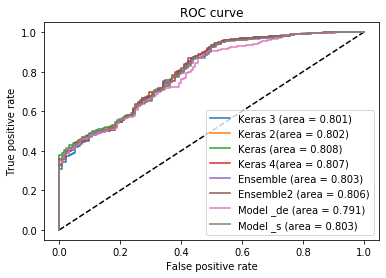

sure, it was defined.


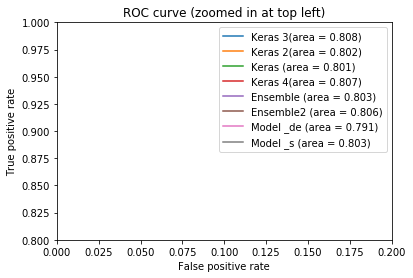

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_keras3, tpr_keras3, thresholds_keras3 = roc_curve(y_test, mse3)
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(y_test, mse2)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, mse)
fpr_keras5, tpr_keras5, thresholds_keras5 = roc_curve(y_test, ensemble2_mse)
fpr_keras_de, tpr_keras_de, thresholds_keras_de = roc_curve(y_test, mse_de)
fpr_keras_s, tpr_keras_s, thresholds_keras_s = roc_curve(y_test, mse_s)
try:
    mse4
except NameError:
    print("well, it WASN'T defined after all!")
else:
    print("sure, it was defined.")
    fpr_keras4, tpr_keras4, thresholds_keras4 = roc_curve(y_test, mse4)
    auc_keras4 = auc(fpr_keras4, tpr_keras4)

fpr_kerasE, tpr_kerasE, thresholds_kerasE = roc_curve(y_test, ensemble)
 
#print(thresholds_keras2)


auc_keras = auc(fpr_keras, tpr_keras)
auc_keras2 = auc(fpr_keras2, tpr_keras2)
auc_keras3 = auc(fpr_keras3, tpr_keras3)

auc_kerasE = auc(fpr_kerasE, tpr_kerasE)
auc_keras5 = auc(fpr_keras5, tpr_keras5)
auc_keras_de = auc(fpr_keras_de, tpr_keras_de)
auc_keras_s = auc(fpr_keras_s, tpr_keras_s)
#print(thresholds_keras)
print('Model 1')
print(auc_keras)
print('Model 2')
print(auc_keras2)
print('Model 3')
print(auc_keras3)
print('Model 4')
#print(auc_keras4)
print('Ensemble')
print(auc_kerasE)
print('Ensemble2')
print(auc_keras5)
#print(thresholds_keras)
print('Model _de')
print(auc_keras_de)
print('Model _s')
print(auc_keras_s)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras 3 (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Keras 2(area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Keras (area = {:.3f})'.format(auc_keras3))
try:
    mse4
except NameError:
    print("well, it WASN'T defined after all!")
else:
    print("sure, it was defined.")
    plt.plot(fpr_keras4, tpr_keras4, label='Keras 4(area = {:.3f})'.format(auc_keras4))
plt.plot(fpr_kerasE, tpr_kerasE, label='Ensemble (area = {:.3f})'.format(auc_kerasE))
plt.plot(fpr_keras5, tpr_keras5, label='Ensemble2 (area = {:.3f})'.format(auc_keras5))
plt.plot(fpr_keras_de, tpr_keras_de, label='Model _de (area = {:.3f})'.format(auc_keras_de))
plt.plot(fpr_keras_s, tpr_keras_s, label='Model _s (area = {:.3f})'.format(auc_keras_s))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras 3(area = {:.3f})'.format(auc_keras3))
plt.plot(fpr_keras2, tpr_keras2, label='Keras 2(area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Keras (area = {:.3f})'.format(auc_keras))
try:
    mse4
except NameError:
    print("well, it WASN'T defined after all!")
else:
    print("sure, it was defined.")
    plt.plot(fpr_keras4, tpr_keras4, label='Keras 4(area = {:.3f})'.format(auc_keras4))
plt.plot(fpr_kerasE, tpr_kerasE, label='Ensemble (area = {:.3f})'.format(auc_kerasE))
plt.plot(fpr_keras5, tpr_keras5, label='Ensemble2 (area = {:.3f})'.format(auc_keras5))
plt.plot(fpr_keras_de, tpr_keras_de, label='Model _de (area = {:.3f})'.format(auc_keras_de))
plt.plot(fpr_keras_s, tpr_keras_s, label='Model _s (area = {:.3f})'.format(auc_keras_s))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

84    0.32576
Name: threshold, dtype: float64


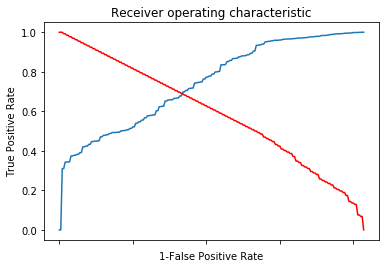

In [33]:
i = np.arange(len(tpr_keras)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr_keras, index=i),'tpr' : pd.Series(tpr_keras, index = i), '1-fpr' : pd.Series(1-fpr_keras, index = i), 'tf' : pd.Series(tpr_keras - (1-fpr_keras), index = i), 'thresholds' : pd.Series(thresholds_keras, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc = pd.DataFrame({'tf' : pd.Series(tpr_keras-(1-fpr_keras), index=i), 'threshold' : pd.Series(thresholds_keras, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
#list(roc_t['threshold'])
threshold1 = roc_t['threshold']
print(threshold1)
threshold1 = threshold1.to_numpy()
threshold1 = threshold1[0]

79    0.34032
Name: threshold, dtype: float64


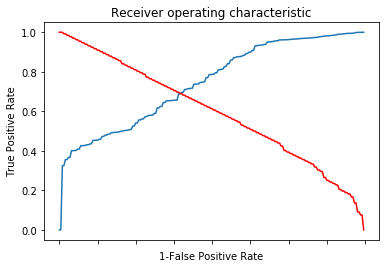

In [34]:
i = np.arange(len(tpr_keras2)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr_keras2, index=i),'tpr' : pd.Series(tpr_keras2, index = i), '1-fpr' : pd.Series(1-fpr_keras2, index = i), 'tf' : pd.Series(tpr_keras2 - (1-fpr_keras2), index = i), 'thresholds' : pd.Series(thresholds_keras2, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc = pd.DataFrame({'tf' : pd.Series(tpr_keras2-(1-fpr_keras2), index=i), 'threshold' : pd.Series(thresholds_keras2, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
list(roc_t['threshold'])
threshold2 = roc_t['threshold']
print(threshold2)
threshold2 = threshold2.to_numpy()
threshold2 = threshold2[0]

81    0.09089
Name: threshold, dtype: float64


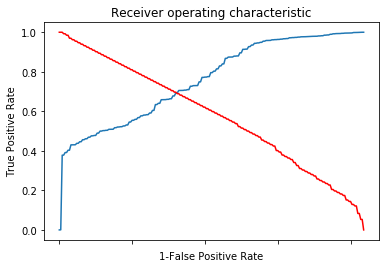

In [35]:
i = np.arange(len(tpr_keras3)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr_keras3, index=i),'tpr' : pd.Series(tpr_keras3, index = i), '1-fpr' : pd.Series(1-fpr_keras3, index = i), 'tf' : pd.Series(tpr_keras3 - (1-fpr_keras3), index = i), 'thresholds' : pd.Series(thresholds_keras3, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc = pd.DataFrame({'tf' : pd.Series(tpr_keras3-(1-fpr_keras3), index=i), 'threshold' : pd.Series(thresholds_keras3, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
list(roc_t['threshold'])
threshold3 = roc_t['threshold']
print(threshold3)
threshold3 = threshold3.to_numpy()
threshold3 = threshold3[0]

77    0.094084
Name: threshold, dtype: float64


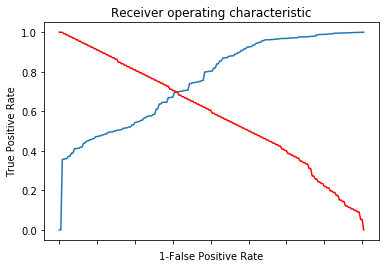

In [36]:
i = np.arange(len(tpr_keras4)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr_keras4, index=i),'tpr' : pd.Series(tpr_keras4, index = i), '1-fpr' : pd.Series(1-fpr_keras4, index = i), 'tf' : pd.Series(tpr_keras4 - (1-fpr_keras4), index = i), 'thresholds' : pd.Series(thresholds_keras4, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc = pd.DataFrame({'tf' : pd.Series(tpr_keras4-(1-fpr_keras4), index=i), 'threshold' : pd.Series(thresholds_keras4, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
#list(roc_t['threshold'])
threshold4 = roc_t['threshold']
print(threshold4)
threshold4 = threshold4.to_numpy()
threshold4 = threshold4[0]

In [37]:
print(max(auc_keras3,auc_keras2,auc_keras))
print(min(auc_keras3,auc_keras2,auc_keras))
print(max(auc_keras3,auc_keras2,auc_keras)-min(auc_keras3,auc_keras2,auc_keras))
print((auc_keras3+auc_keras2+auc_keras)/3)

0.8076181758647377
0.8014675239626123
0.006150651902125381
0.803804250759064


In [38]:
#ensemble

result1 = [];
result2 = [];
result3 = [];
result4 = [];
#print(threshold1)
print('1') 
for i in range(0,mse.size):
    if(mse[i][0]>threshold1):
        result1.append(1);
    else:
        result1.append(0);
    if(mse2[i][0]>threshold2):
        result2.append(1);
    else:
        result2.append(0);
    if(mse3[i]>threshold3):
        result3.append(1);
    else:
        result3.append(0);
    if(mse4[i]>threshold4):
        result4.append(1);
    else:
        result4.append(0);
        
correct =0; 
correct2 =0; 
correct3 =0; 
correct4 =0; 
correctE =0;
for i in range(0,mse.size):
    if(result1[i] == y_test.to_numpy()[i]):
        correct = correct + 1;

print(correct/mse.size)
print('2') 

for i in range(0,mse.size):
    if(result2[i] == y_test.to_numpy()[i]):
        correct2 = correct2 + 1;
        

print(correct2/mse.size)
print('3') 

for i in range(0,mse.size):
    if(result3[i] == y_test.to_numpy()[i]):
        correct3 = correct3 + 1;
print(correct3/mse.size)
print('4')   

for i in range(0,mse.size):
    if(result4[i] == y_test.to_numpy()[i]):
        correct4 = correct4 + 1;

print(correct4/mse.size)
print('E')  


for i in range(0,mse.size):
    temp = (result1[i] + result2[i] + result3[i] + result4[i])/4
    if(temp>0.5):
        if(1 == y_test.to_numpy()[i]):
            correctE = correctE + 1;
    else:
        if(0 == y_test.to_numpy()[i]):
            correctE = correctE + 1;
        
print(correctE/mse.size)


1
0.6969557195571956
2
0.6886531365313653
3
0.6928044280442804
4
0.6964944649446494
E
0.6891143911439115


In [39]:
# from deepstack.base import KerasMember

# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4, random_state=23)

# member1 = KerasMember(name="model1", keras_model=autoencoder, train_batches=(X_train, X_train), val_batches=(X_test,X_test))
# member2 = KerasMember(name="model2", keras_model=autoencoder2, train_batches=(X_train, X_train), val_batches=(X_test,X_test))
# member3 = KerasMember(name="model3", keras_model=autoencoder3, train_batches=(X_train, X_train), val_batches=(X_test,X_test))
# member4 = KerasMember(name="model4", keras_model=autoencoder4, train_batches=(X_train, X_train), val_batches=(X_test,X_test))


In [40]:
# from deepstack.ensemble import DirichletEnsemble

# wAvgEnsemble = DirichletEnsemble()
# wAvgEnsemble.add_members([member1, member2, member3, member4])
# wAvgEnsemble.fit()
# wAvgEnsemble.describe()

In [41]:
# from keras.layers import Layer as layers
# from keras.layers import  Input, Dense 

# from keras.models import Model
# import keras.backend as K
# import tensorflow as tf

# class WeightedSum(layers):
#     """A custom keras layer to learn a weighted sum of tensors"""
#     constraint=tf.keras.constraints.min_max_norm(max_value=1,min_value=0)
#     def __init__(self, **kwargs):
#         super(WeightedSum, self).__init__(**kwargs)

#     def build(self, input_shape=1):
#         self.a = self.add_weight(
#             name='alpha',
#             shape=(),
#             initializer='ones',
#             dtype='float32',
#             trainable=True,
#         )
#         super(WeightedSum, self).build(input_shape)

#     def call(self, model_outputs):
#         return self.a * model_outputs[0] + (1 - self.a) * model_outputs[1]

#     def compute_output_shape(self, input_shape):
#         return input_shape[0]

In [42]:
# # Weighed sum of the two models' outputs with a = 0.1
# out = WeightedSum([autoencoder.output, autoencoder2.output])

# # Create the merged model
# model = Model(inputs=[inputs, inputs2], outputs=[out])